In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignoring the warings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing loan dataset
l=pd.read_csv('./loan.csv')
l.shape

(39717, 111)

In [4]:
#Getting Column Info
l.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

In [5]:
#Getting Data types
l.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Data Cleaning

In [6]:
# Dropping all the rows,columns that have all null values
l = l.dropna(axis=1, how='all')
l = l.dropna(axis=0, how='all')
l.shape

(39717, 57)

In [7]:
l.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [8]:
# Dropping all the rows,columns that null values greater than 50%
l = l.dropna(axis=1, thresh=39717//2)
l.shape

(39717, 54)

In [9]:
##Drop unnecessary columns which are not required for analysis and some doesn't have changing values
l=l.drop(['member_id','url','desc','emp_title','zip_code','tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','pymnt_plan','initial_list_status'],axis=1)

In [10]:
# Dropping Applicants with Loan Status column as Current, as it will not be considered under our analysis
l=l[l['loan_status']!='Current']

### Data Manupulation
    Target Columns: emp_length, int_rate, revol_util and pub_rec_bankruptcies

In [11]:
# Fetching Details of emp_length column
l['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object

In [12]:
# Fetching Details of emp_length column
l['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [13]:
# Getting the number of non-null values
l['emp_length'].info() 

<class 'pandas.core.series.Series'>
Int64Index: 38577 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
37544 non-null  object
dtypes: object(1)
memory usage: 602.8+ KB


In [14]:
# Declaring function to help with manupulation
def exp(x):
    years=x['emp_length']
    if years[2]=='+':
        return str(10)
    elif years[0]=='<':
        return str(0)
    else:
        return years[0]
l['emp_length']=l[l['emp_length'].notna()].apply(exp,axis=1)
l['emp_length'].fillna('0',inplace=True)
l['emp_length'].info()

<class 'pandas.core.series.Series'>
Int64Index: 38577 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
38577 non-null  object
dtypes: object(1)
memory usage: 602.8+ KB


In [15]:
# Getting details of revol_util
l['revol_util'].value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

In [16]:
# Getting details of int_rate
l['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [17]:
# Removing % from the columns entries
l['revol_util']=l['revol_util'].apply(lambda x: str(x)[:-1])
l['int_rate']=l['int_rate'].apply(lambda x: str(x)[:-1])

In [18]:
# Validation
l['revol_util'].value_counts()

0        954
0.20      62
63        62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: revol_util, Length: 1089, dtype: int64

In [19]:
# Validation
l['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [21]:
# Working on pub_rec_bankruptcies, getting the null values count
l['pub_rec_bankruptcies'].isna().sum()

697

In [22]:
l['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
l['pub_rec_bankruptcies'].fillna('UnKnown',inplace=True)
l['pub_rec_bankruptcies'].value_counts()

0.0        36238
1.0         1637
UnKnown      697
2.0            5
Name: pub_rec_bankruptcies, dtype: int64

### Outlier Identification & Removal
    Target Column: Annual Income

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

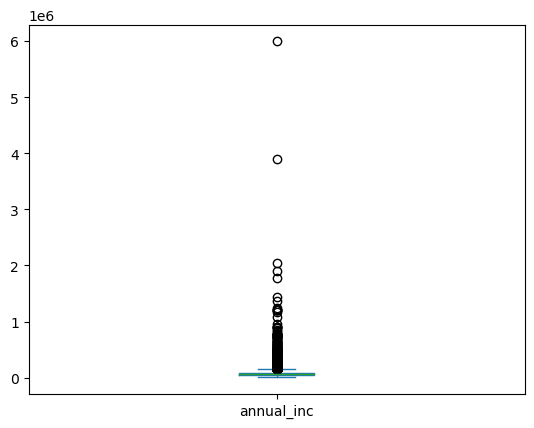

In [24]:
l['annual_inc'].plot.box()
l['annual_inc'].describe()

In [25]:
# Taking the qualtile 0.95 as seeing the value
l['annual_inc'].quantile((0.95))

140004.0

In [26]:
# Applicants with annual income less than qualtile 0.95
(l['annual_inc']<=142000).value_counts()

True     36689
False     1888
Name: annual_inc, dtype: int64

In [27]:
# Updating the dataset
l=l[l['annual_inc']<=142000]

<Axes: >

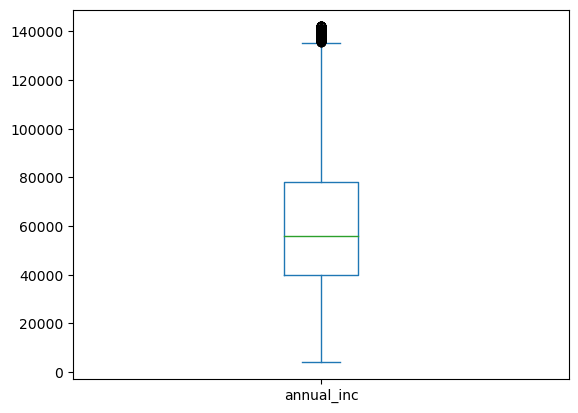

In [28]:
# Validating with Boxplot
l['annual_inc'].plot.box()

In [29]:
l.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

### Deriving columns
    Target Columns: issue_d and int_rate

In [30]:
# Getting the details of issue_d
l['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39711    Jul-07
39712    Jul-07
39713    Jul-07
39714    Jul-07
39716    Jun-07
Name: issue_d, Length: 36689, dtype: object

In [34]:
# Deriving columns
l_month_year=l['issue_d'].str.partition("-", True)
l['issue_month']=l_month_year[0]                       
l['issue_year']='20' + l_month_year[2] 

In [35]:
# Validating
l.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,2011
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,2011
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,2011
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,2011
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,Dec,2011


In [38]:
# Converting int_rate column entries to float and then creating buckets/bins for int_rate column
l['int_rate']=l['int_rate'].apply(lambda x: float(x))
l['interest_rate_categories']=pd.cut(l['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','12.5-16','16+'])
l.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year,interest_rate_categories
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,2011,10-13
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,2011,12.5-16
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,2011,12.5-16
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,2011,12.5-16
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,...,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,Dec,2011,0-10


### Univariate Analysis
    Target:
        Charged Offs vs Issue Year
        Charged Offs vs Interest Rate
        Charged Offs vs Annual Income​
        Charged Offs vs Purpose​
        Charged Offs vs Home Ownership
        Charged Offs vs Term​​

In [42]:
l['loan_status'].value_counts()

Fully Paid     31268
Charged Off     5421
Name: loan_status, dtype: int64

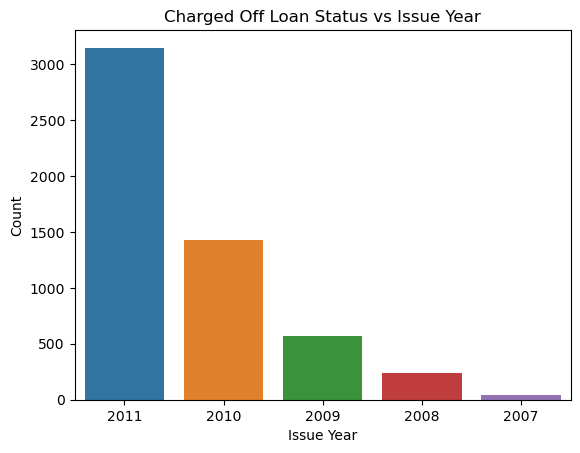

In [43]:
#Charged Offs vs Issue Year
ax=sns.countplot(x='issue_year',data=l[l['loan_status']=='Charged Off'])
ax.set( title='Charged Off Loan Status vs Issue Year')
ax.set_xlabel('Issue Year')
ax.set_ylabel('Count')
plt.show()

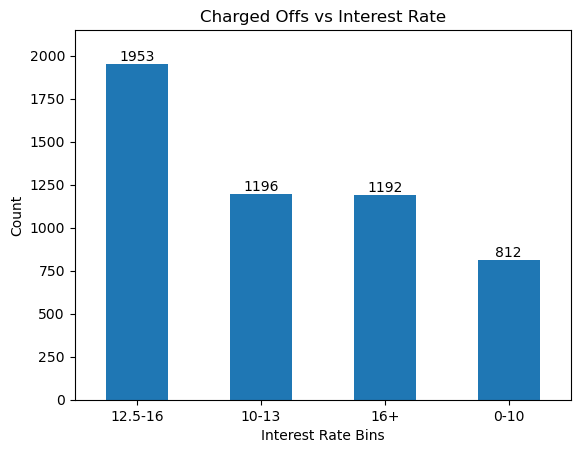

In [44]:
#Charged Offs vs Interest Rate
out=l[l['loan_status']=='Charged Off']['interest_rate_categories'].value_counts().plot(kind='bar',title='Charged Offs vs Interest Rate',xlabel='Interest Rate Bins',ylabel='Count',rot=0)
out.bar_label(out.containers[0], label_type='edge')
out.margins(y=0.1)

[Text(0.5, 1.0, 'Annual Income Distribution Plot')]

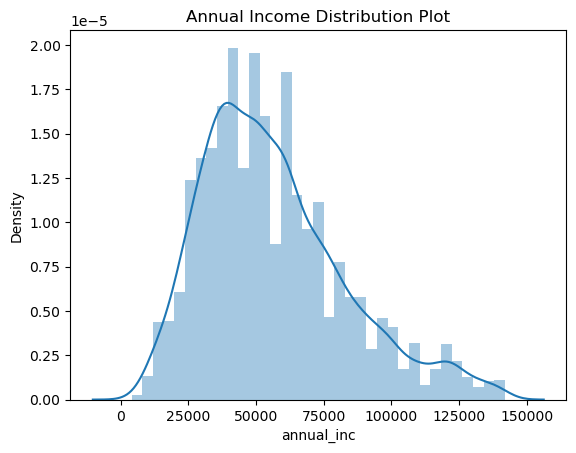

In [45]:
#Charged Offs vs Annual Income
ax=sns.distplot(l[l['loan_status']=='Charged Off']['annual_inc'])
ax.set(title='Annual Income Distribution Plot')

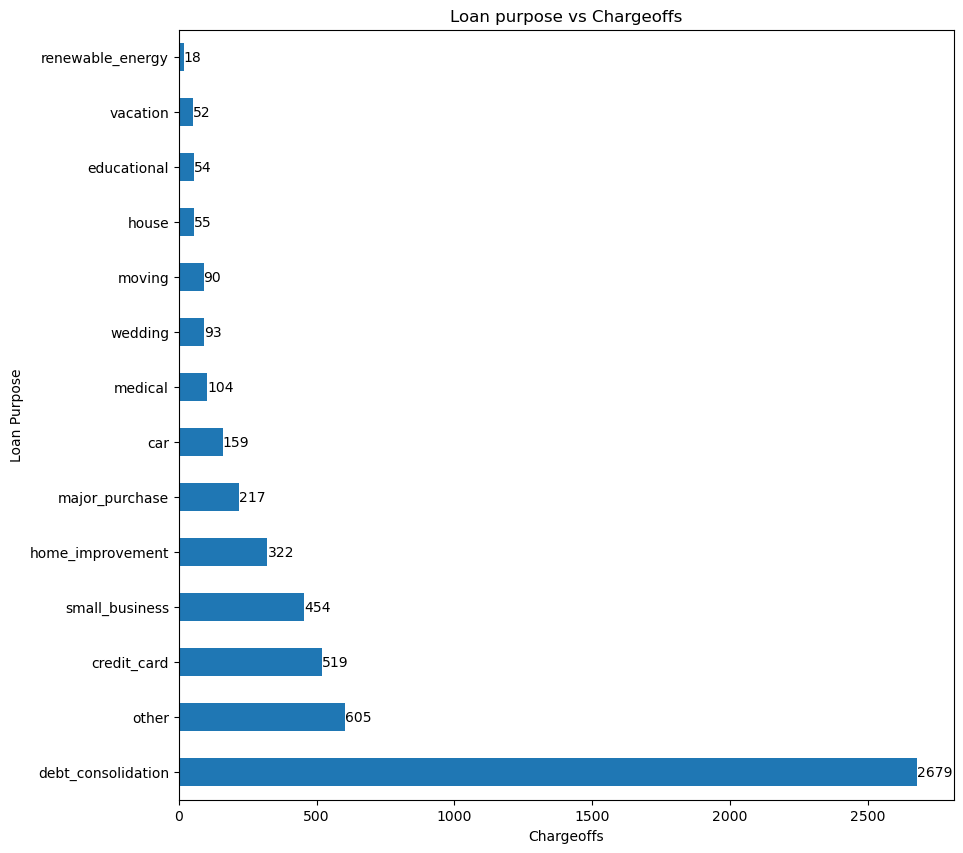

In [46]:
#Charged Offs vs Purpose
out=l[l['loan_status']=='Charged Off']['purpose'].value_counts().plot(kind='barh',figsize=(10,10),title='Loan purpose vs Chargeoffs',xlabel='Chargeoffs',ylabel='Loan Purpose',rot=0)
out.bar_label(out.containers[0],label_type='edge')
out.margins(y=0.1)

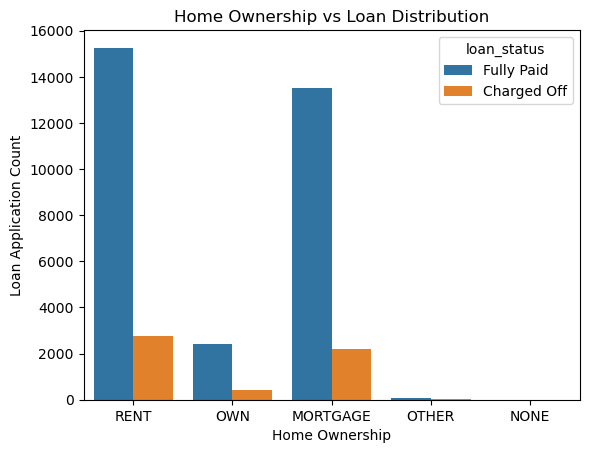

In [47]:
#Charged Offs vs Home Ownership
out=sns.countplot(x="home_ownership",data=l,hue='loan_status')
out.set(title='Home Ownership vs Loan Distribution')
out.set_xlabel('Home Ownership')
out.set_ylabel('Loan Application Count')
plt.show()

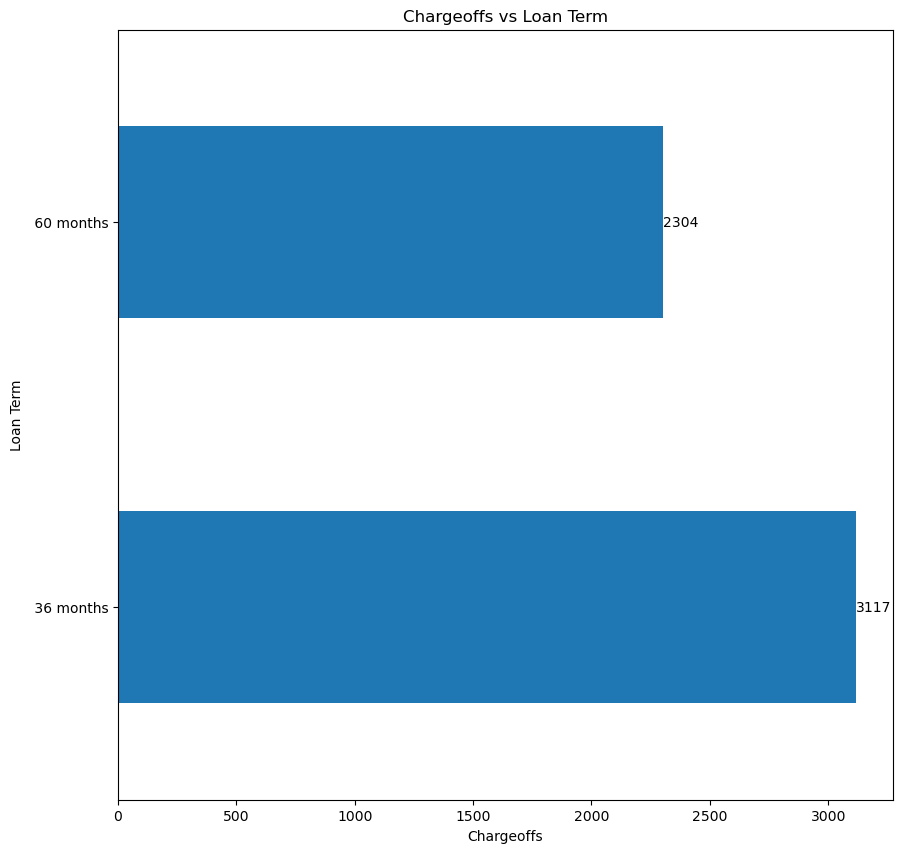

In [48]:
#Charged Offs vs Term
out=l[l['loan_status']=='Charged Off']['term'].value_counts().plot(kind='barh',figsize=(10,10),title='Chargeoffs vs Loan Term',xlabel='Chargeoffs',ylabel='Loan Term',rot=0)
out.bar_label(out.containers[0],label_type='edge')
out.margins(y=0.1)

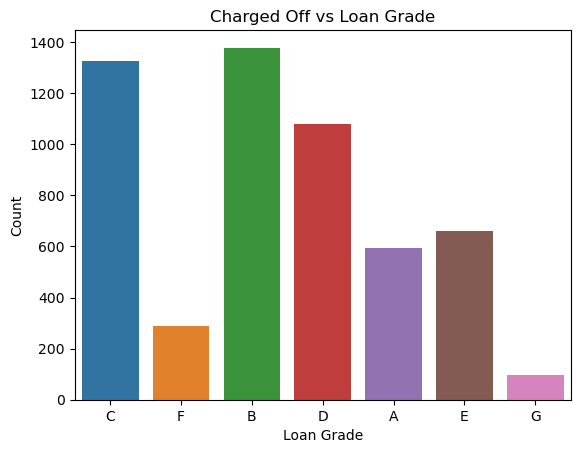

In [49]:
#Charged Offs vs Loan Grade
ax=sns.countplot(x='grade',data=l[l['loan_status']=='Charged Off'])
ax.set( title='Charged Off vs Loan Grade')
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Count')
plt.show()

### Bivariate Analysis
    Target:
        Charged Offs Proportion vs Purpose
        Charged Offs Proportion vs Grade
        Charged Offs Proportion vs Sub-Grade
        Charged Offs Proportion vs Interest Rate
        Charged Offs Proportion vs Public Bankruptcy Records
        Purpose of Loan vs Loan amount
        Purpose of Loan vs Interest Rate

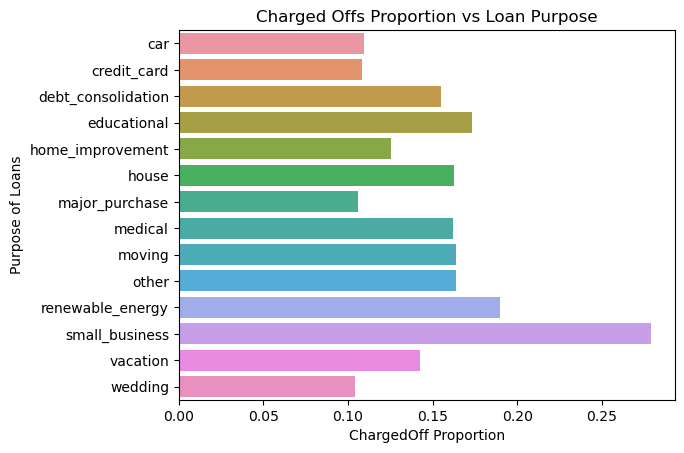

In [50]:
#Charged Offs Proportion vs Purpose
l_purp=l.groupby(by=['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
l_purp['Total']=l_purp['Charged Off']+l_purp['Fully Paid']
l_purp['ChargedOff_Proportion']=l_purp['Charged Off']/l_purp['Total']
l_purp.sort_values('ChargedOff_Proportion',ascending=False)

ax=sns.barplot(y='purpose',x='ChargedOff_Proportion',data=l_purp)
ax.set_ylabel('Purpose of Loans')
ax.set_xlabel('ChargedOff Proportion')
ax.set(title='Charged Offs Proportion vs Loan Purpose')
plt.show()

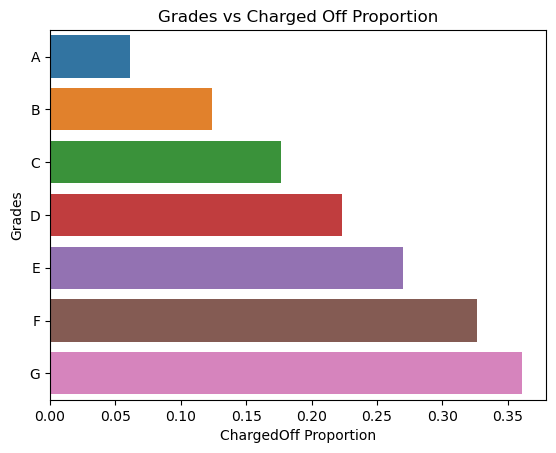

In [51]:
# Charged Offs Proportion vs Grade
l_grade=l.groupby(by=['grade','loan_status']).loan_status.count().unstack().reset_index()
l_grade['Total']=l_grade['Charged Off']+l_grade['Fully Paid']
l_grade['Charged_Off_Proportion']=l_grade['Charged Off']/l_grade['Total']
l_grade.sort_values('Charged_Off_Proportion',ascending=False)

ax=sns.barplot(x='Charged_Off_Proportion',y='grade',data=l_grade)
ax.set_xlabel('ChargedOff Proportion')
ax.set_ylabel('Grades')
ax.set(title='Grades vs Charged Off Proportion')
plt.show()

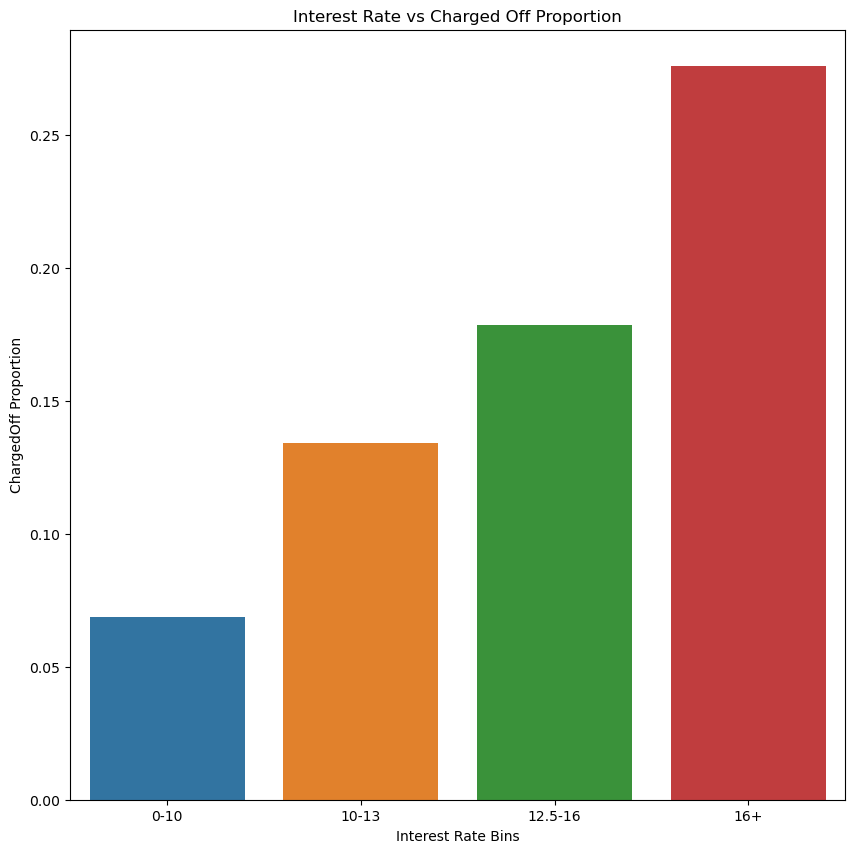

In [53]:
#Charged Offs Proportion vs Interest Rate
l_int=l.groupby(by=['interest_rate_categories','loan_status']).loan_status.count().unstack().reset_index()
l_int['Total']=l_int['Charged Off']+l_int['Fully Paid']
l_int['Charged_Off_Proportion']=l_int['Charged Off']/l_int['Total']
l_int.sort_values('Charged_Off_Proportion',ascending=False)

fig,ax1=plt.subplots(figsize=(10,10))
ax1=sns.barplot(x='interest_rate_categories',y='Charged_Off_Proportion',data=l_int)
ax1.set_ylabel('ChargedOff Proportion'),
ax1.set_xlabel('Interest Rate Bins')
ax1.set(title='Interest Rate vs Charged Off Proportion')
plt.show()

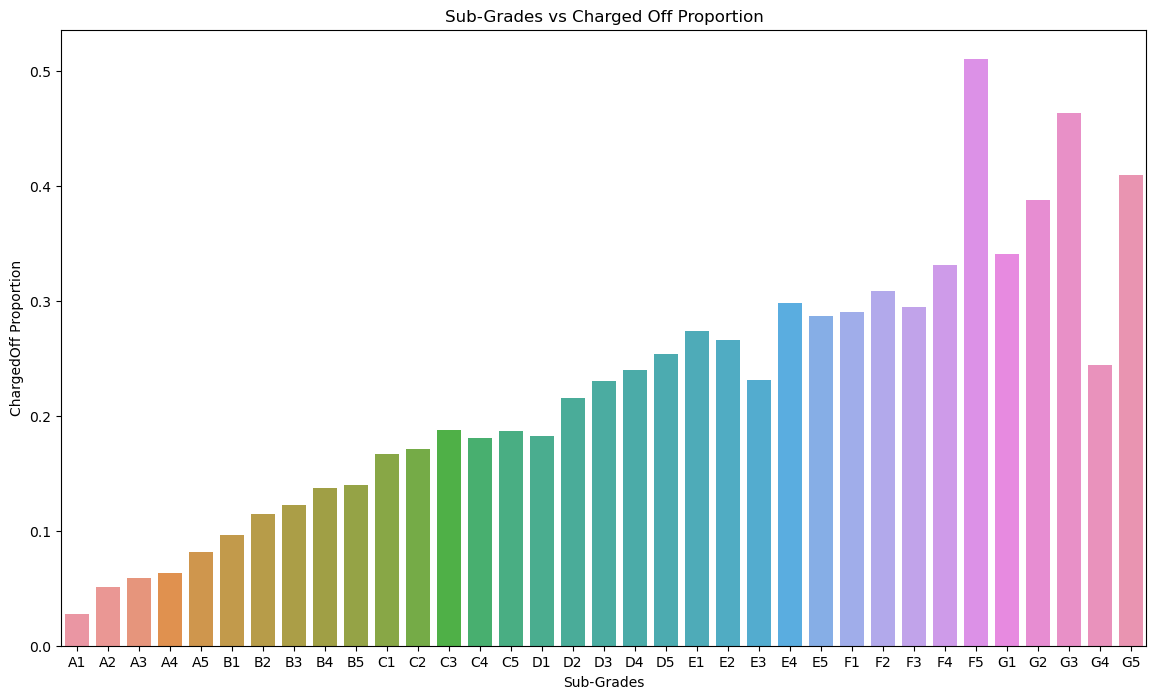

In [54]:
#Charged Offs Proportion vs Sub-Grade
l_grade=l.groupby(by=['sub_grade','loan_status']).loan_status.count().unstack().reset_index()
l_grade['Total']=l_grade['Charged Off']+l_grade['Fully Paid']
l_grade['Charged_Off_Proportion']=l_grade['Charged Off']/l_grade['Total']
l_grade.sort_values('Charged_Off_Proportion',ascending=False)

fig,ax1=plt.subplots(figsize=(14,8))
ax1=sns.barplot(x='sub_grade',y='Charged_Off_Proportion',data=l_grade)
ax1.set_ylabel('ChargedOff Proportion'),
ax1.set_xlabel('Sub-Grades')
ax1.set(title='Sub-Grades vs Charged Off Proportion')
plt.show()

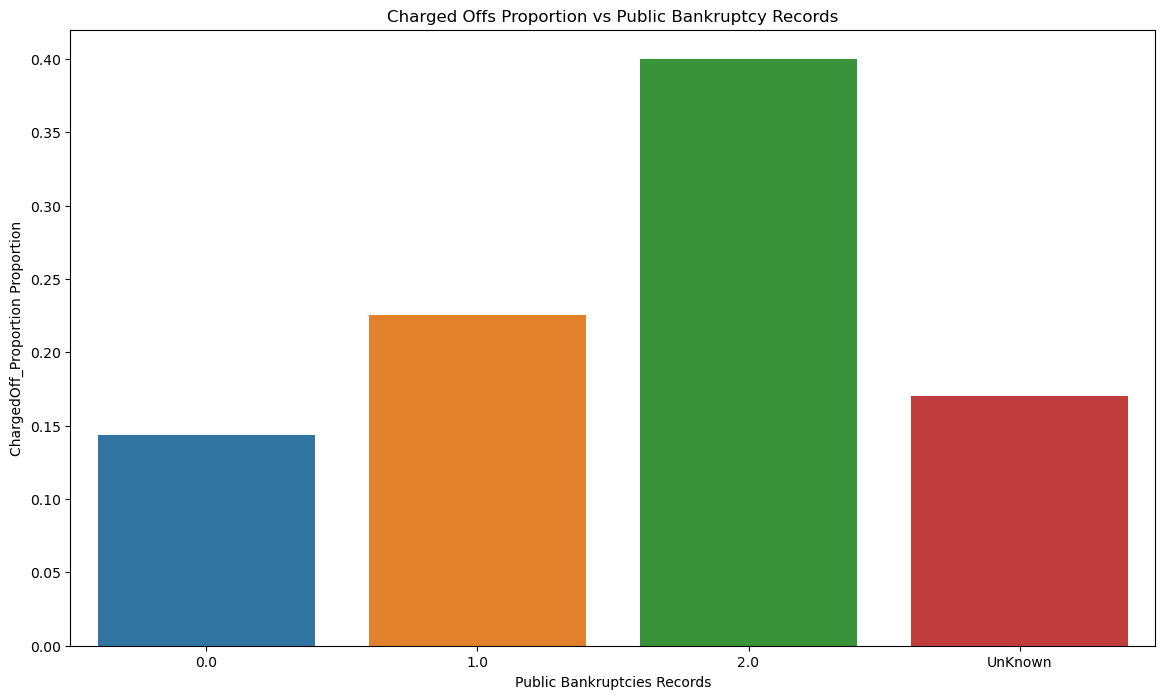

In [57]:
l_pub_bank = l.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
l_pub_bank['Total'] = l_pub_bank['Charged Off'] + l_pub_bank['Fully Paid']
l_pub_bank['ChargedOff_Proportion'] = l_pub_bank['Charged Off']/l_pub_bank['Total']
l_pub_bank.sort_values('ChargedOff_Proportion', ascending=False)

fig,ax1=plt.subplots(figsize=(14,8))
ax1=sns.barplot(x='pub_rec_bankruptcies',y='ChargedOff_Proportion',data=l_pub_bank)
ax1.set_ylabel('ChargedOff_Proportion Proportion'),
ax1.set_xlabel('Public Bankruptcies Records')
ax1.set(title='Charged Offs Proportion vs Public Bankruptcy Records')
plt.show()

[Text(0.5, 1.0, 'Loan Purpose vs Loan Amount')]

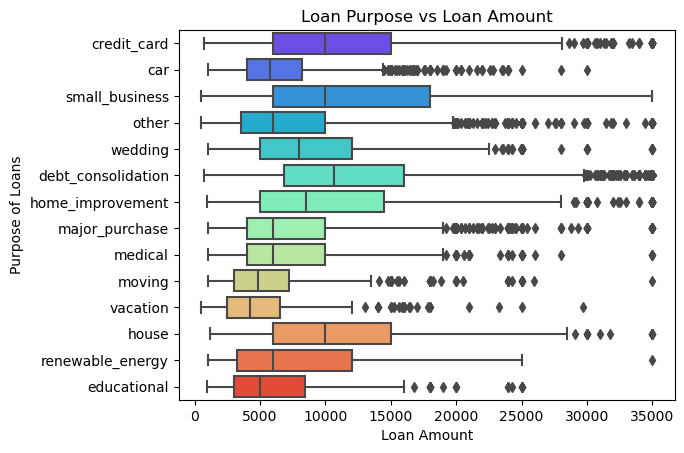

In [60]:
#Purpose of Loan vs Loan amount​
ax=sns.boxplot(y='purpose',x='loan_amnt',data=l,palette='rainbow')
ax.set_ylabel('Purpose of Loans')
ax.set_xlabel('Loan Amount')
ax.set(title='Loan Purpose vs Loan Amount')

[Text(0.5, 1.0, 'Loan Purpose vs Interest Rate')]

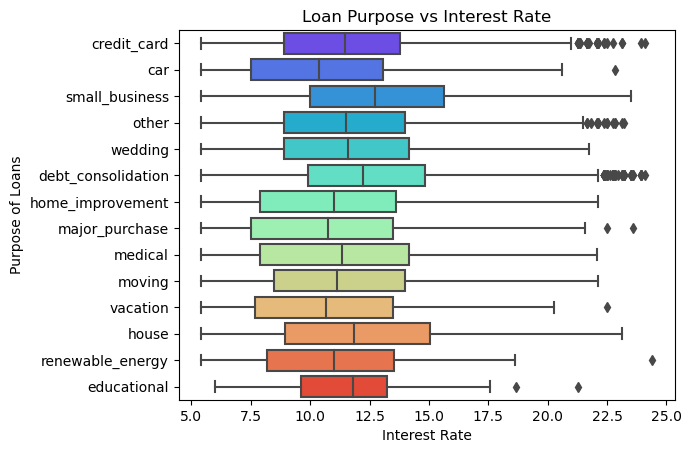

In [61]:
#​​​​Purpose of Loan vs Interest Rate
ax=sns.boxplot(y='purpose',x='int_rate',data=l,palette='rainbow')
ax.set_ylabel('Purpose of Loans')
ax.set_xlabel('Interest Rate')
ax.set(title='Loan Purpose vs Interest Rate')

### Segmented  Univariate Analysis

In [67]:
# Converting the loan_status values as integer so that they can be plotted in bar graph
l['loan_status'] = l['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
l['loan_status'] = l['loan_status'].apply(lambda x: pd.to_numeric(x))

In [71]:
# filtering the df for the 5 types of loans mentioned above
main_purposes = ["credit_card","small_business","debt_consolidation","home_improvement","major_purchase"]
l = l[l['purpose'].isin(main_purposes)]
l['purpose'].value_counts()

debt_consolidation    17316
credit_card            4786
home_improvement       2564
major_purchase         2049
small_business         1627
Name: purpose, dtype: int64

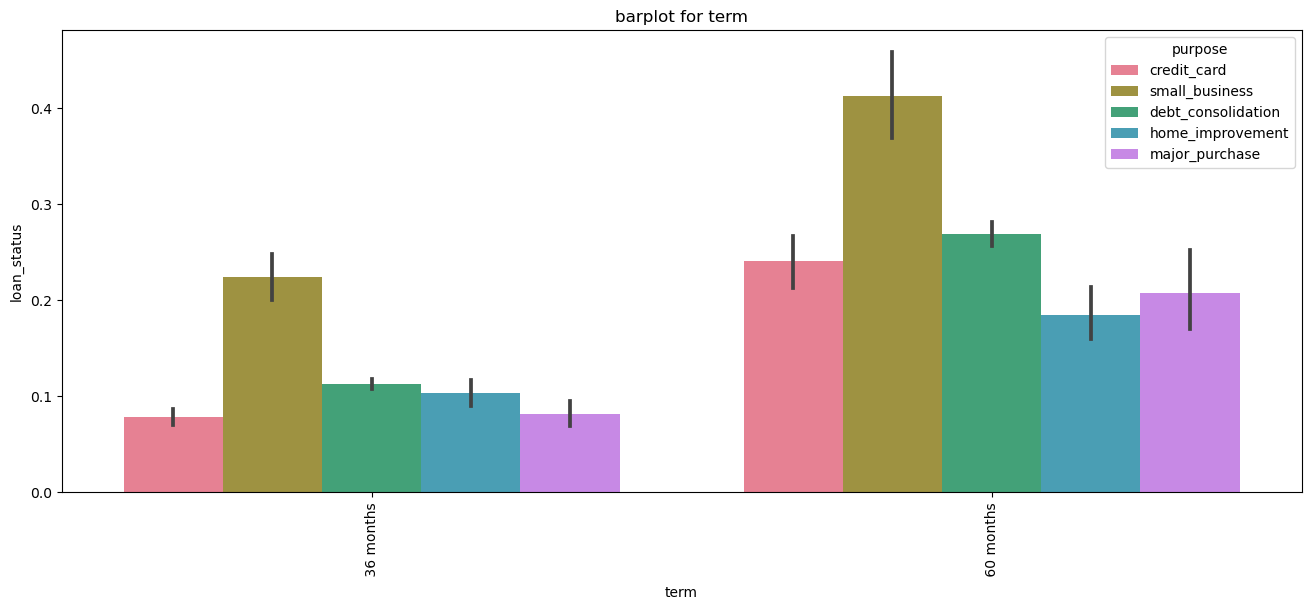

In [72]:
# Loan Status vs Term for Segmented Purpose
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
title = "barplot for term"
plt.title(title)
sns.barplot(x='term', y='loan_status', hue='purpose', data=l, palette = "husl")
plt.show()

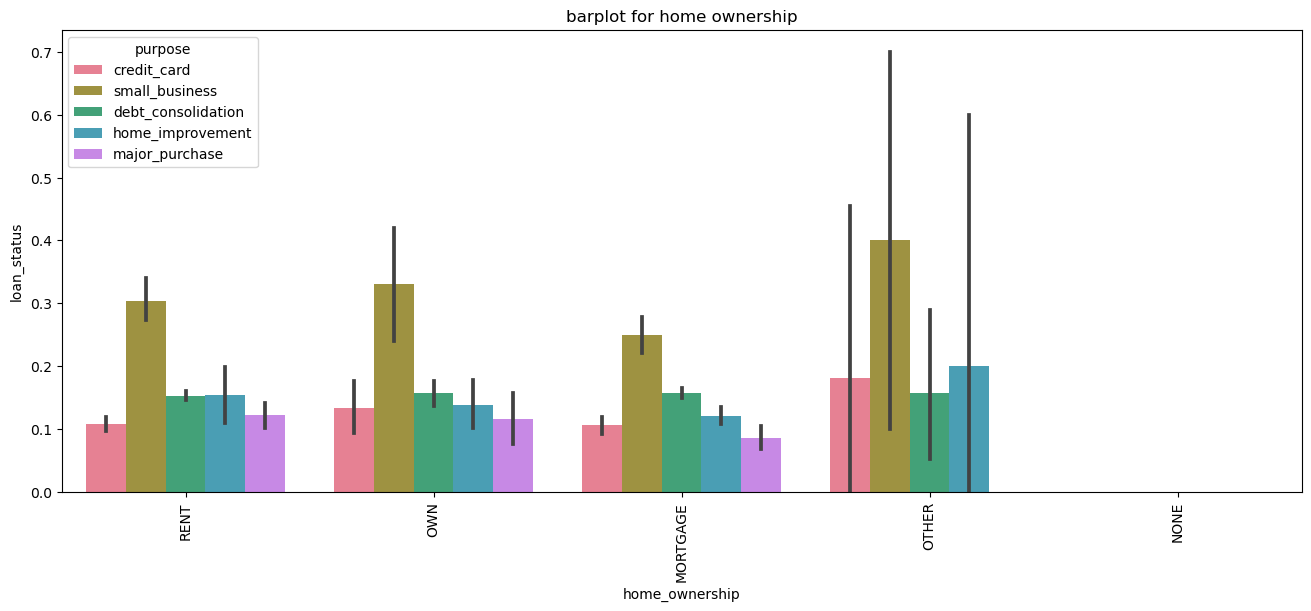

In [73]:
# Loan Status vs Home Ownership for Segmented Purpose
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
title = "barplot for home ownership"
plt.title(title)
sns.barplot(x='home_ownership', y='loan_status', hue='purpose', data=l, palette = "husl")
plt.show()